In [ ]:
# gdal call for gin
# gdalwarp -te 257000.00 4182200.00 261900.00 4186400.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/TUO/ASO_3M_PCDTM_USCACE_20191010_20191010.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/GIN/dem.tif

# gdal call for str
# gdalwarp -te 274774.00 4167468.00 276276.00 4169008.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/TUO/ASO_3M_PCDTM_USCAMB_20140830_20191005.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/dem.tif

# gdal call for dpo
# gdalwarp -te 316737.00 4163713.00 318694.00 4165592.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/TUO/ASO_3M_PCDTM_USCASJ_20161023_20191010.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/DPO/dem.tif

# gdal call for tum
# gdalwarp -te 291393.00 4194161.00 292896.00 4195035.00
# -r average
# /Users/jpflug/Documents/TEMP/ASO_3M_PCDTM_USCATE_20140827_20191010.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/TUM/dem.tif

# gdal call for dan
# gdalwarp -te 300586.00 4195676.00 302745.00 4198726.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CA/ASO_Tuolumne_2023Jun01-02_AllData_and_Reports/ASO_Tuolumne_2023Jun01-02_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/DAN/ASO_Tuolumne_2023Jun01-02_swe_50m.tif

# gdal call for dan
# gdalwarp -te 300586.00 4195676.00 302745.00 4198726.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CA/ASO_Tuolumne_2023Jun26-27_AllData_and_Reports/ASO_Tuolumne_2023Jun26-27_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/DAN/ASO_Tuolumne_2023Jun26-27_swe_50m.tif

# gdal call for dan
# gdalwarp -te 300586.00 4195676.00 302745.00 4198726.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CA/ASO_Tuolumne_Mosaic_2020May7_AllData_and_Reports/ASO_Tuolumne_Mosaic_2020May7_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/DAN/ASO_Tuolumne_Mosaic_2020May7_swe_50m.tif

# gdal call for 551
# gdalwarp -te 424793.00 4485539.00 426560.00 4487132.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CO/ASO_Poudre_2023May22_AllData_and_Reports/ASO_Poudre_2023May22_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/551/ASO_Poudre_2023May22_swe_50m.tif

# gdal call for 737
# gdalwarp -te 323405.00 4319574.00 325035.00 4320929.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CO/ASO_EastRiver_2023May23_AllData_and_Reports/ASO_EastRiver_2023May23_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/737/ASO_EastRiver_2023May23_swe_50m.tif

# gdal call for 869
# gdalwarp -te 403057.00 4464572.00 405015.00 4466286.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CO/ASO_WindyGap_2022May26_AllData_and_Reports/ASO_WindyGap_2022May26_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/869/ASO_WindyGap_2022May26_swe_50m.tif

# gdal call for 869
# gdalwarp -te 403057.00 4464572.00 405015.00 4466286.00
# -r average
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/CO/ASO_WindyGap_2023May27_AllData_and_Reports/ASO_WindyGap_2023May27_swe_50m.tif
# /Users/jpflug/Documents/Projects/cubesatReanaly/Data/ASOdata/869/ASO_WindyGap_2023May27_swe_50m.tif

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
DOMIDs = ['DAN','DPO','GIN','STR','551','737','869']
base_direcs = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/' 

# custom_cmap = ['#4D384A','#E5782E','#F9C71F','#9E5546']
custom_cmap = ['#000000','#9E5546','#E5782E','#F9C71F']
# custom_cmap = ['#302383','#37763B','#61A89A','#98CAEB']
custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [3]:
for DOMcount,DOM in enumerate(DOMIDs):
    
    file = base_direcs+DOM+'/self_classified/SCA/avgDSD_anomaly.tif'
    ref_data = xr.open_dataset(file)
    data = ref_data['band_data'][0,:,:].values
    breaks = np.nanpercentile(data,[25,50,75])
    print(breaks)
    data_classes = np.empty(data.shape)
    data_classes[:] = 0
    data_classes[data > breaks[0]] = 1
    data_classes[data > breaks[1]] = 2
    data_classes[data > breaks[2]] = 3
    data_classes[np.isnan(data)] = np.nan

    if DOMcount == 0:
        data_classes1 = data_classes.copy()
    elif DOMcount == 1:
        data_classes2 = data_classes.copy()
    elif DOMcount == 2:
        data_classes3 = data_classes.copy()
    elif DOMcount == 3:
        data_classes4 = data_classes.copy()
    elif DOMcount == 4:
        data_classes5 = data_classes.copy()
    elif DOMcount == 5:
        data_classes6 = data_classes.copy()
    else:
        data_classes7 = data_classes.copy()
    # break


[-4.          7.4000001  13.19999981]
[-4.80000019  0.80000001  9.80000019]
[-5.4000001  -0.2         5.19999981]
[-6.80000019 -0.2         5.5999999 ]
[-11.60000038   0.          10.80000019]
[-7.5999999   0.40000001  8.        ]
[-1.60000002  4.5999999  12.80000019]


Text(0.5, 1.0, 'g. 869')

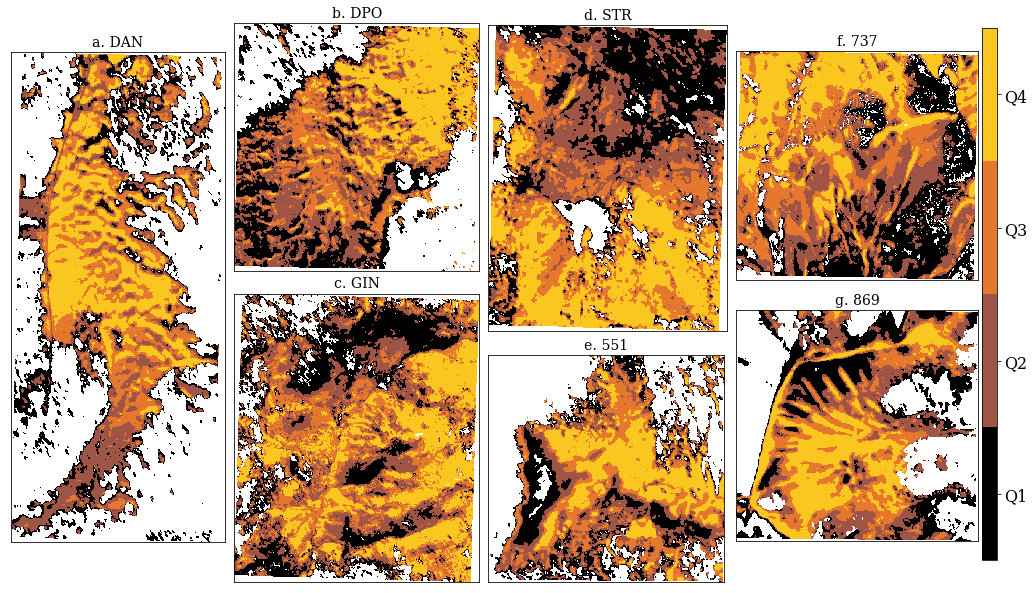

In [4]:
fig = plt.figure(figsize=(8.5,8.5))

ax1 = fig.add_axes([0.01, 0.05, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.4, 0.295, 0.4, 0.8])  # left, bottom, width, height
ax3 = fig.add_axes([0.4, -0.18, 0.4, 0.8])  # left, bottom, width, height
ax4 = fig.add_axes([0.815, 0.245, 0.39, 0.8])  # left, bottom, width, height
ax5 = fig.add_axes([0.815, -0.23, 0.386, 0.8])  # left, bottom, width, height
ax6 = fig.add_axes([1.22, 0.265, 0.395, 0.8])  # left, bottom, width, height
ax7 = fig.add_axes([1.22, -0.16, 0.395, 0.8])  # left, bottom, width, height

out = ax1.imshow(data_classes1,cmap=custom_cmap,interpolation='none')
ax2.imshow(data_classes2,cmap=custom_cmap,interpolation='none')
ax3.imshow(data_classes3,cmap=custom_cmap,interpolation='none')
ax4.imshow(data_classes4,cmap=custom_cmap,interpolation='none')
ax5.imshow(data_classes5,cmap=custom_cmap,interpolation='none')
ax6.imshow(data_classes6,cmap=custom_cmap,interpolation='none')
ax7.imshow(data_classes7,cmap=custom_cmap,interpolation='none')

cax = fig.add_axes([1.622, 0.02, 0.025, 0.87]) 
cbar = plt.colorbar(out, cax=cax)
tx = np.linspace(0,3,9)
cbar.set_ticks([tx[1],tx[3],tx[5],tx[7]])
cbar.set_ticklabels(['Q1','Q2','Q3','Q4'],fontsize=16)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax7.set_xticks([])
ax7.set_yticks([])

ax1.set_title('a. DAN',fontsize=14)
ax2.set_title('b. DPO',fontsize=14)
ax3.set_title('c. GIN',fontsize=14)
ax4.set_title('d. STR',fontsize=14)
ax5.set_title('e. 551',fontsize=14)
ax6.set_title('f. 737',fontsize=14)
ax7.set_title('g. 869',fontsize=14)

# fig.savefig('/Users/jpflug/Documents/Projects/cubesatReanaly/ppts/figs/snowClasses.svg',format='svg',bbox_inches='tight',dpi=1200)


[-4.          7.4000001  13.19999981]


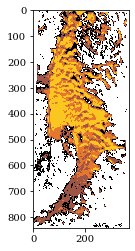

In [7]:
# save the class for a specific domain

DOM2Save = 'DAN'

file = base_direcs+DOM2Save+'/self_classified/SCA/avgDSD_anomaly.tif'
ref_data = xr.open_dataset(file)
data = ref_data['band_data'][0,:,:].values
breaks = np.nanpercentile(data,[25,50,75])
print(breaks)
data_classes = np.empty(data.shape)
data_classes[:] = 0
data_classes[data > breaks[0]] = 1
data_classes[data > breaks[1]] = 2
data_classes[data > breaks[2]] = 3
data_classes[np.isnan(data)] = np.nan

plt.imshow(data_classes,cmap=custom_cmap,interpolation='none')
np.save(base_direcs+DOM2Save+'/self_classified/SCA/classified_quartile.npy',data_classes)

In [149]:
for DOMcount,DOM in enumerate(DOMIDs):
    
    file = base_direcs+DOM+'/self_classified/SCA/avgDSD_anomaly.tif'
    ref_data = xr.open_dataset(file)
    data = ref_data['band_data'][0,:,:].values
    
    if DOMcount == 0:
        data_classes1 = data.copy()
    elif DOMcount == 1:
        data_classes2 = data.copy()
    elif DOMcount == 2:
        data_classes3 = data.copy()
    elif DOMcount == 3:
        data_classes4 = data.copy()
    elif DOMcount == 4:
        data_classes5 = data.copy()
    elif DOMcount == 5:
        data_classes6 = data.copy()
    else:
        data_classes7 = data.copy()

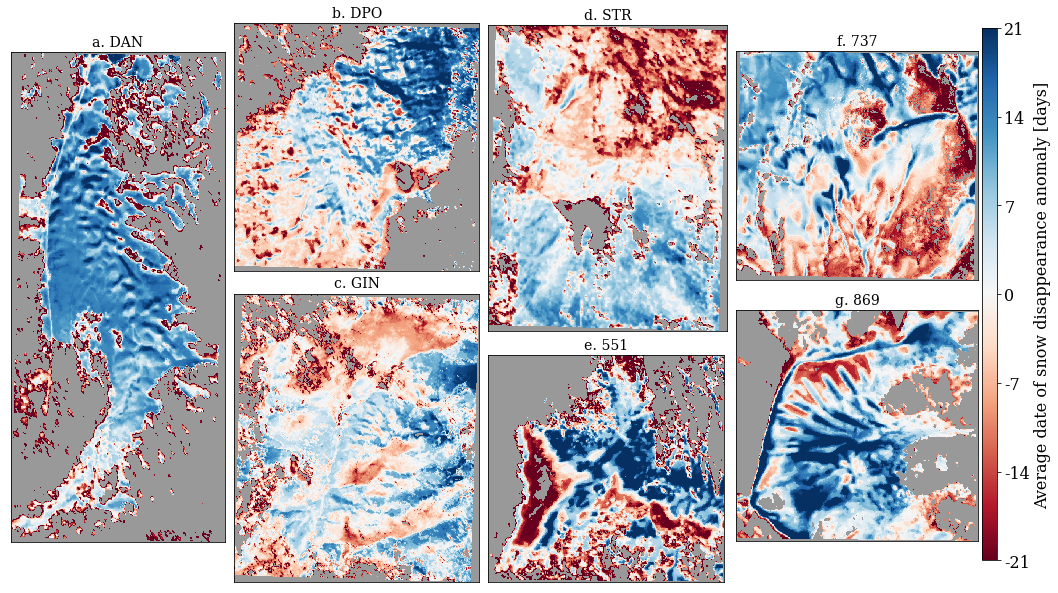

In [161]:
fig = plt.figure(figsize=(8.5,8.5))

ax1 = fig.add_axes([0.01, 0.05, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.4, 0.295, 0.4, 0.8])  # left, bottom, width, height
ax3 = fig.add_axes([0.4, -0.18, 0.4, 0.8])  # left, bottom, width, height
ax4 = fig.add_axes([0.815, 0.245, 0.39, 0.8])  # left, bottom, width, height
ax5 = fig.add_axes([0.815, -0.23, 0.386, 0.8])  # left, bottom, width, height
ax6 = fig.add_axes([1.22, 0.265, 0.395, 0.8])  # left, bottom, width, height
ax7 = fig.add_axes([1.22, -0.16, 0.395, 0.8])  # left, bottom, width, height

out = ax1.imshow(data_classes1,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax2.imshow(data_classes2,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax3.imshow(data_classes3,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax4.imshow(data_classes4,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax5.imshow(data_classes5,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax6.imshow(data_classes6,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')
ax7.imshow(data_classes7,cmap='RdBu',vmin=-21,vmax=21,interpolation='none')

cax = fig.add_axes([1.622, 0.02, 0.025, 0.87]) 
cbar = plt.colorbar(out, cax=cax)
tx = np.linspace(0,3,9)
cbar.set_ticks([-21,-14,-7,0,7,14,21])
cbar.set_ticklabels([-21,-14,-7,0,7,14,21],fontsize=16)
cbar.set_label('Average date of snow disappearance anomaly [days]',fontsize=16)
# cbar.set_ticklabels(['Q1','Q2','Q3','Q4'],fontsize=16)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax7.set_xticks([])
ax7.set_yticks([])

ax1.set_title('a. DAN',fontsize=14)
ax2.set_title('b. DPO',fontsize=14)
ax3.set_title('c. GIN',fontsize=14)
ax4.set_title('d. STR',fontsize=14)
ax5.set_title('e. 551',fontsize=14)
ax6.set_title('f. 737',fontsize=14)
ax7.set_title('g. 869',fontsize=14)

ax1.set_facecolor([0.6,0.6,0.6])
ax2.set_facecolor([0.6,0.6,0.6])
ax3.set_facecolor([0.6,0.6,0.6])
ax4.set_facecolor([0.6,0.6,0.6])
ax5.set_facecolor([0.6,0.6,0.6])
ax6.set_facecolor([0.6,0.6,0.6])
ax7.set_facecolor([0.6,0.6,0.6])

fig.savefig('/Users/jpflug/Documents/Projects/cubesatReanaly/ppts/figs/DSD_allDomains.svg',format='svg',bbox_inches='tight',dpi=1200)


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from rasterio.enums import Resampling
from scipy.signal import convolve2d

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
from matplotlib.colors import ListedColormap


In [2]:
# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/GIN/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/GIN/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/GIN/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/GIN/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/STR/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/DPO/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/DPO/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/DPO/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/DPO/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/TUM/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/TUM/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/TUM/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/TUM/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/869/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/869/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/869/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/869/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/793/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/793/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/793/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/793/classified.npy'

# dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/551/dem.tif'
# chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/551/chm.tif'
# ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/551/averageDSD_anomaly.tif'
# class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/551/classified.npy'

dem_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/737/dem.tif'
chm_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/737/chm.tif'
ref_file = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/737/averageDSD_anomaly.tif'
class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/737/classified.npy'

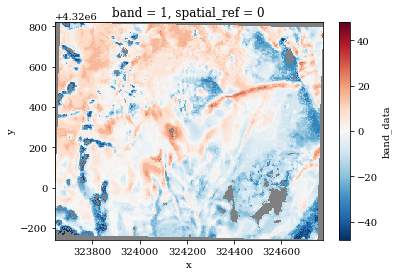

In [3]:
ref_data = xr.open_dataset(ref_file)
fg,ax = plt.subplots()
ref_data['band_data'].plot(ax=ax)
ax.set_facecolor([0.5,0.5,0.5])

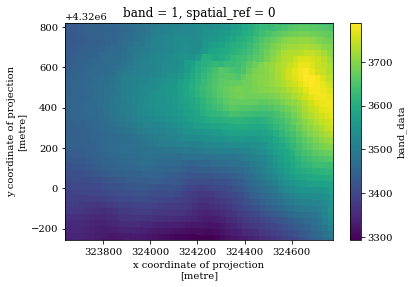

In [5]:
eleV = xr.open_dataset(dem_file)
# eleV['band_data'] = eleV['band_data'].where(eleV['band_data'] >= 1000, np.nan)
eleV = eleV.rio.reproject_match(ref_data)
eleV['band_data'][0,:,:].plot()
eleV = eleV['band_data'][0,:,:].values 

In [6]:
try:
    chm = xr.open_dataset(chm_file).rio.reproject_match(ref_data)
    chm = chm['band_data'][0,:,:].values
    chm[chm < 5] = 0
    chm[chm > 0] = 1

    fg,ax = plt.subplots()
    ax.imshow(chm,interpolation='none')

    kernel = np.ones((3, 3)) / 9  # 3x3 averaging kernel

    shpp = chm.shape
    distances = np.arange(0,200)
    dce = np.empty((len(distances)+1,shpp[0],shpp[1]))
    dce[:] = 0

    dce[0,chm == 1] = 1

    fg,ax = plt.subplots()
    ax.imshow(dce[0,:,:],vmin=0,vmax=1,interpolation='none')

    for dist in distances:
        chm = convolve2d(chm, kernel, mode='same', boundary='symm')
        chm[chm > 0] = 1
        chm[chm < 1] = 0
        dce[dist+1,:,:] = chm

    dce = np.argmax(dce,axis=0)*1.
    for _ in np.arange(np.nanmax(dce)):
        dce = convolve2d(dce, kernel, mode='same', boundary='symm')

    ax.imshow(dce,vmin=0,vmax=20,interpolation='none')
except:
    dce = np.zeros(eleV.shape)


(454, 354)
(454, 354)
0.0027998042592141236


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+01, 1.6000e+01, 3.3000e+01,
        5.1000e+01, 1.4500e+02, 2.9100e+02, 5.8400e+02, 1.2760e+03,
        2.7090e+03, 6.4090e+03, 1.5102e+04, 3.0332e+04, 4.0513e+04,
        3.0650e+04, 1.4774e+04, 5.9110e+03, 2.6000e+03, 1.2800e+03,
        6.1200e+02, 3.7800e+02, 2.1500e+02, 1.4200e+02, 8.1000e+01,
        5.3000e+01, 4.0000e+01, 3.4000e+01, 2.8000e+01, 8.0000e+00,
        1.5000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
        -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
        -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
        -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
        -0.73469388, -0.57142857, -0.4

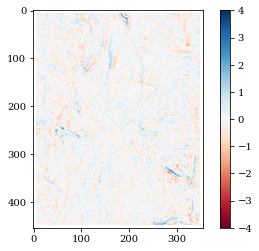

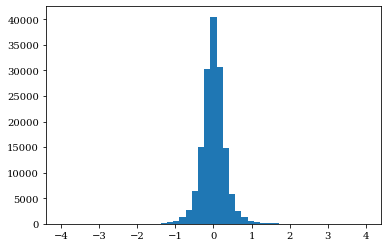

In [33]:
# def calcTPI(image):
#     # Define kernel sizes
#     small_kernel_size = 3
#     large_kernel_size = 9
#     # small_kernel_size = 4
#     # large_kernel_size = 12

#     # Pad the image to handle boundary pixels
#     small_padding = small_kernel_size // 2
#     large_padding = large_kernel_size // 2

#     padded_image = np.pad(image, pad_width=((small_padding, small_padding), (large_padding, large_padding)), mode='constant')

#     # Create kernels for 3x3 and 9x9 windows
#     small_kernel = np.ones((small_kernel_size, small_kernel_size)) / (small_kernel_size ** 2)
#     large_kernel = np.ones((large_kernel_size, large_kernel_size)) / (large_kernel_size ** 2)

#     # Convolve the image with the small and large kernels using 'same' mode
#     mean_small = convolve2d(padded_image, small_kernel, mode='same')
#     mean_large = convolve2d(padded_image, large_kernel, mode='same')

#     # # Calculate the mean difference and trim to the original image shape
#     # mean_difference = mean_small[:, large_padding:-large_padding]
#     mean_difference = mean_small[:, large_padding:-large_padding] - mean_large[:, large_padding:-large_padding]
#     # mean_difference = mean_difference[small_padding:-small_padding, :]

#     return mean_difference

def calcTPI(image):
    # Define kernel sizes
    small_kernel_size = 3
    large_kernel_size = 9

    # Pad the image to handle boundary pixels for both small and large kernels
    small_padding = small_kernel_size // 2
    large_padding = large_kernel_size // 2

    padded_image_small = np.pad(image, pad_width=((small_padding, small_padding), (small_padding, small_padding)), mode='constant')
    padded_image_large = np.pad(image, pad_width=((large_padding, large_padding), (large_padding, large_padding)), mode='constant')

    # Create kernels for 3x3 and 9x9 windows
    small_kernel = np.ones((small_kernel_size, small_kernel_size)) / (small_kernel_size ** 2)
    large_kernel = np.ones((large_kernel_size, large_kernel_size)) / (large_kernel_size ** 2)

    # Convolve the image with the small and large kernels using 'same' mode
    mean_small = convolve2d(padded_image_small, small_kernel, mode='same')
    mean_large = convolve2d(padded_image_large, large_kernel, mode='same')

    # Calculate the mean difference and trim to the original image shape
    trimmed_mean_small = mean_small[small_padding:-small_padding, small_padding:-small_padding]
    trimmed_mean_large = mean_large[large_padding:-large_padding, large_padding:-large_padding]

    # Calculate the mean difference and trim to the original image shape
    mean_difference = trimmed_mean_large - trimmed_mean_small

    return mean_difference



print(eleV.shape)
TPI = calcTPI(eleV)
TPI[TPI < -4] = np.nan
TPI[TPI > 4] = np.nan
print(TPI.shape)
print(np.nanmean(TPI))
# low_bound = np.percentile(np.ravel(TPI),[2.5])
# up_bound = np.percentile(np.ravel(TPI),[97.5])
# TPI[TPI < low_bound] = low_bound
# TPI[TPI > up_bound] = up_bound

fg,ax = plt.subplots()
out = ax.imshow(TPI,vmin=-4,vmax=4,cmap='RdBu')
fg.colorbar(out)

fg,ax = plt.subplots()
ax.hist(np.ravel(TPI),np.linspace(-4,4))

In [ ]:
dx, dy = np.gradient(eleV, axis=(1,0))

slope = np.arctan(np.sqrt(dx**2 + dy**2))

aspect = np.degrees(np.arctan2(-dx, dy))+180
aspect = np.cos(np.radians(202.5-aspect))

DAH = aspect*np.arctan(slope)
anom = ref_data['band_data'][0,:,:].values
DAH[np.isnan(anom)] = np.nan
# TPI[np.isnan(anom)] = np.nan
dce[np.isnan(anom)] = np.nan

fg,ax = plt.subplots(figsize=(20,20))
out = ax.imshow(DAH,vmin=-0.2,vmax=0.2,interpolation='none')
fg.colorbar(out)

fg,ax = plt.subplots(figsize=(20,20))
out = ax.imshow(dce,vmin=0,vmax=50,interpolation='none')
fg.colorbar(out)

NameError: name 'np' is not defined

/var/folders/m4/q1120d2116gb0kq3xdjvyj3r0000gp/T/ipykernel_44385/263593917.py:6: RuntimeWarning: invalid value encountered in true_divide
  dce_norm = (dce-np.nanmin(dce))/(np.nanmax(dce)-np.nanmin(dce))


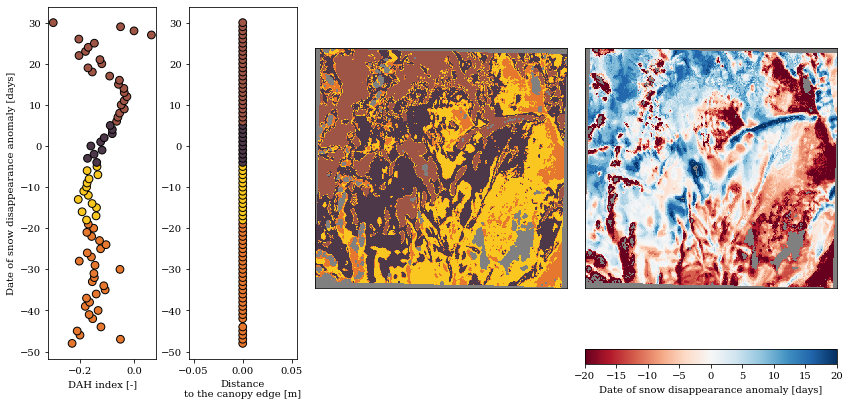

In [8]:
import statistics
anom_round = np.round(anom)
# anom_norm = (anom-np.nanmin(anom))/(np.nanmax(anom)-np.nanmin(anom))
anom_norm = anom
DAH_norm = (DAH-np.nanmin(DAH))/(np.nanmax(DAH)-np.nanmin(DAH))
dce_norm = (dce-np.nanmin(dce))/(np.nanmax(dce)-np.nanmin(dce))
dce_norm[np.isnan(dce_norm)] = 0
data = np.column_stack((anom_norm[~np.isnan(anom)],
                       DAH_norm[~np.isnan(anom)],
                       dce_norm[~np.isnan(anom)]))

shpp = anom.shape
X, Y = np.meshgrid(np.arange(shpp[1]),np.arange(shpp[0]))
X = X[~np.isnan(anom)]
Y = Y[~np.isnan(anom)]

kmn = KMeans(n_clusters=4)
kmn.fit(data)

labels = kmn.labels_

classified = np.empty(anom.shape)
classified[:] = np.nan
classified[Y.astype(int),X.astype(int)] = labels

dsd_unique = np.unique(anom_round)[:-1]
mean_dah,mean_dce,common_class = [],[],[]
for temp in dsd_unique:
    # print(temp)
    mean_dah.append(np.mean(DAH[anom_round == temp]))
    mean_dce.append(np.nanmean(dce[anom_round == temp]))
    common_class.append(statistics.mode(classified[anom_round == temp]))

    
    
custom_cmap = ['#4D384A','#E5782E','#F9C71F','#9E5546']
custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')


fg = plt.figure(figsize=(5,7))

# plot for DAH versus DSD anomaly
ax1 = fg.add_axes([0.01, 0.01, 0.3, 0.7])
ax1.scatter(mean_dah,dsd_unique,60,common_class,cmap=custom_cmap,zorder=200,edgecolor='k')
ax1.set_xlabel('DAH index [-]')
ax1.set_ylabel('Date of snow disappearance anomaly [days]')

ax2 = fg.add_axes([0.4, 0.01, 0.3, 0.7])
# ax2.scatter(mean_dce,dsd_unique,20,'k',zorder=200)
ax2.scatter(np.array(mean_dce)*3.,dsd_unique,60,common_class,cmap=custom_cmap,zorder=200,edgecolor='k')
ax2.set_xlabel('Distance\nto the canopy edge [m]')

ax4 = fg.add_axes([0.75, -0.01, 0.7, 0.8])
ax4.imshow(classified,cmap=custom_cmap)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_facecolor([0.5,0.5,0.5])

ax5 = fg.add_axes([1.5, -0.01, 0.7, 0.8])
out = ax5.imshow(anom,vmin=-20,vmax=20,cmap='RdBu',interpolation='none')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_facecolor([0.5,0.5,0.5])

cbar_ax = fg.add_axes([1.5, 0., 0.7, 0.03])  # Adjust the position as needed
cbar = plt.colorbar(out, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Date of snow disappearance anomaly [days]', labelpad=5)


In [9]:
### save the data!!!
np.save(class_outfile,classified)

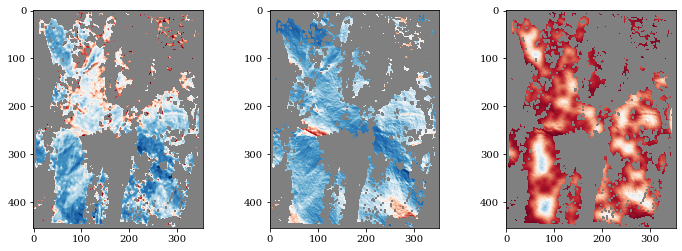

In [70]:
# anom_norm = (anom-np.nanmin(anom))/(np.nanmax(anom)-np.nanmin(anom))
DAH_norm = (DAH-np.nanmin(DAH))/(np.nanmax(DAH)-np.nanmin(DAH))
TPI_norm = (dce-np.nanmin(dce))/(np.nanmax(dce)-np.nanmin(dce))

fg,ax = plt.subplots(1,3,figsize=(12,4))
ax = np.ravel(ax)

# ax[0].imshow(anom_norm,vmin=0,vmax=1,cmap='RdBu')
ax[0].imshow(anom,vmin=-20,vmax=20,cmap='RdBu')
ax[1].imshow(DAH_norm,vmin=0,vmax=1,cmap='RdBu')
ax[2].imshow(TPI_norm*DAH_norm,vmin=0,vmax=1,cmap='RdBu')

for axx in ax:
    axx.set_facecolor([0.5,0.5,0.5])

In [32]:
mean_dah,mean_tpi = [],[]
anom_round = np.round(anom)
anom_lims = np.nanpercentile(anom_round,[5,95])
DAH_ref = DAH.copy()
TPI_ref = TPI.copy()
DAH_ref[anom_round < anom_lims[0]] = np.nan
DAH_ref[anom_round > anom_lims[1]] = np.nan
TPI_ref[anom_round < anom_lims[0]] = np.nan
TPI_ref[anom_round > anom_lims[1]] = np.nan
anom_round[anom_round < anom_lims[0]] = np.nan
anom_round[anom_round > anom_lims[1]] = np.nan


dsd_unique = np.unique(anom_round)
for temp in dsd_unique:
    mean_dah.append(np.mean(DAH[anom_round == temp]))
    mean_tpi.append(np.nanmean(TPI[anom_round == temp]))

fg = plt.figure(figsize=(5,7))

# plot for DAH versus DSD anomaly
ax1 = fg.add_axes([0.01, 0.01, 0.3, 0.8])
ax1.scatter(mean_dah,dsd_unique,20,'k',zorder=200)
x_limits = ax1.get_xlim()
y_limits = ax1.get_ylim()
limsDAH = np.nanpercentile(DAH_ref,[33,66])
rectangle = patches.Rectangle((limsDAH[0],y_limits[0]), limsDAH[1]-limsDAH[0],y_limits[1]-y_limits[0],
                              facecolor=[0.25,0.25,1],alpha = 0.33)
ax1.add_patch(rectangle)
rectangle = patches.Rectangle((limsDAH[1],y_limits[0]), x_limits[1]-limsDAH[1],y_limits[1]-y_limits[0],
                              facecolor=[0.25,0.25,1],alpha = 0.66)
ax1.add_patch(rectangle)
ax1.set_xticks(np.round(limsDAH*100)/100)
ax1.set_xlabel('DAH index [-]')
ax1.set_ylabel('Date of snow disappearance anomaly [days]')

# plot TPI versus DSD anomaly
ax2 = fg.add_axes([0.4, 0.01, 0.3, 0.8])
ax2.scatter(mean_tpi,dsd_unique,20,'k',zorder=200)
x_limits = ax2.get_xlim()
y_limits = ax2.get_ylim()
rectangle = patches.Rectangle((x_limits[0],y_limits[0]), 0-x_limits[0],y_limits[1]-y_limits[0],
                              facecolor=[1,0.25,0.25],alpha = 0.33)
ax2.add_patch(rectangle)
ax2.set_xlabel('Topographical\nPosition Index [m]')

ax3 = fg.add_axes([0.9, 0.01, 0.45, 0.15])
for alpha_blue in [0,0.33,0.66]:
    for alpha_red in [0.33,0]:
        rectangle = patches.Rectangle((alpha_blue,alpha_red), 0.33, 0.33,
                                          edgecolor='none', facecolor=[0.25,0.25,1],alpha = alpha_blue)
        ax3.add_patch(rectangle)
        rectangle = patches.Rectangle((alpha_blue,alpha_red), 0.33, 0.33,
                                          edgecolor='none', facecolor=[1,0.25,0.25],alpha = alpha_red)
        ax3.add_patch(rectangle)
ax3.set_xlim([0,0.99])
ax3.set_ylim([0,0.66])
ax3.set_xticks([0.165,0.495,0.825])
ax3.set_xticklabels(['sunny','flat','shaded'])
ax3.set_yticks([0.165,0.495])
ax3.set_yticklabels(['exposed','drepressed'])

ax4 = fg.add_axes([0.75, 0.09, 0.7, 0.8])

custom_cmap = ['#AA6BC0','#D495C0','#F9C0C0',
              '#8181FF','#C0C0FF','#FFFFFF']
custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')

snow_classes = np.empty((DAH.shape))
snow_classes[:] = np.nan

snow_classes[(DAH > limsDAH[1]) & (TPI <= 0)] = 1
snow_classes[(DAH > limsDAH[0]) & (DAH <= limsDAH[1]) & (TPI <= 0)] = 2
snow_classes[(DAH <= limsDAH[0]) & (TPI <= 0)] = 3
snow_classes[(DAH > limsDAH[1]) & (TPI > 0)] = 4
snow_classes[(DAH > limsDAH[0]) & (DAH <= limsDAH[1]) & (TPI > 0)] = 5
snow_classes[(DAH <= limsDAH[0]) & (TPI > 0)] = 6

ax4.imshow(snow_classes,cmap=custom_cmap,interpolation='none')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_facecolor([0.5,0.5,0.5])

ax5 = fg.add_axes([1.5, 0.09, 0.7, 0.8])
out = ax5.imshow(anom,vmin=-20,vmax=20,cmap='RdBu',interpolation='none')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_facecolor([0.5,0.5,0.5])

cbar_ax = fg.add_axes([1.5, 0.08, 0.7, 0.03])  # Adjust the position as needed
cbar = plt.colorbar(out, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Date of snow disappearance anomaly [days]', labelpad=5)

NameError: name 'TPI' is not defined

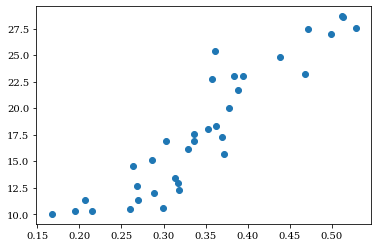

In [48]:
plt.scatter(mean_dah,mean_dce)

/Users/jpflug/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jpflug/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/m4/q1120d2116gb0kq3xdjvyj3r0000gp/T/ipykernel_92422/2608689265.py:17: RuntimeWarning: Mean of empty slice
  mean_dce.append(np.nanmean(dce[anom_round == temp]))


Text(0.5, 0, 'Topographical\nPosition Index [m]')

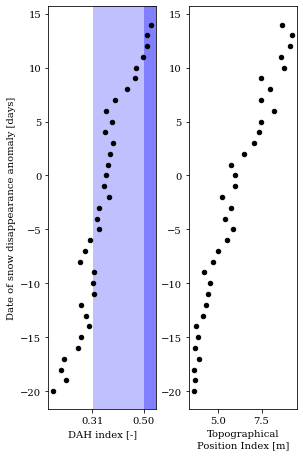

In [71]:
mean_dah,mean_dce = [],[]
anom_round = np.round(anom)
anom_lims = np.nanpercentile(anom_round,[5,95])
DAH_ref = DAH.copy()
DCE_ref = dce.copy()
DAH_ref[anom_round < anom_lims[0]] = np.nan
DAH_ref[anom_round > anom_lims[1]] = np.nan
DCE_ref[anom_round < anom_lims[0]] = np.nan
DCE_ref[anom_round > anom_lims[1]] = np.nan
anom_round[anom_round < anom_lims[0]] = np.nan
anom_round[anom_round > anom_lims[1]] = np.nan


dsd_unique = np.unique(anom_round)
for temp in dsd_unique:
    mean_dah.append(np.mean(DAH[anom_round == temp]))
    mean_dce.append(np.nanmean(dce[anom_round == temp]))

fg = plt.figure(figsize=(5,7))

# plot for DAH versus DSD anomaly
ax1 = fg.add_axes([0.01, 0.01, 0.3, 0.8])
ax1.scatter(mean_dah,dsd_unique,20,'k',zorder=200)
x_limits = ax1.get_xlim()
y_limits = ax1.get_ylim()
limsDAH = np.nanpercentile(DAH_ref,[33,66])
rectangle = patches.Rectangle((limsDAH[0],y_limits[0]), limsDAH[1]-limsDAH[0],y_limits[1]-y_limits[0],
                              facecolor=[0.25,0.25,1],alpha = 0.33)
ax1.add_patch(rectangle)
rectangle = patches.Rectangle((limsDAH[1],y_limits[0]), x_limits[1]-limsDAH[1],y_limits[1]-y_limits[0],
                              facecolor=[0.25,0.25,1],alpha = 0.66)
ax1.add_patch(rectangle)
ax1.set_xticks(np.round(limsDAH*100)/100)
ax1.set_xlabel('DAH index [-]')
ax1.set_ylabel('Date of snow disappearance anomaly [days]')

# plot TPI versus DSD anomaly
ax2 = fg.add_axes([0.4, 0.01, 0.3, 0.8])
ax2.scatter(mean_dce,dsd_unique,20,'k',zorder=200)
x_limits = ax2.get_xlim()
y_limits = ax2.get_ylim()
rectangle = patches.Rectangle((x_limits[0],y_limits[0]), 0-x_limits[0],y_limits[1]-y_limits[0],
                              facecolor=[1,0.25,0.25],alpha = 0.33)
ax2.add_patch(rectangle)
ax2.set_xlabel('Topographical\nPosition Index [m]')

# ax3 = fg.add_axes([0.9, 0.01, 0.45, 0.15])
# for alpha_blue in [0,0.33,0.66]:
#     for alpha_red in [0.33,0]:
#         rectangle = patches.Rectangle((alpha_blue,alpha_red), 0.33, 0.33,
#                                           edgecolor='none', facecolor=[0.25,0.25,1],alpha = alpha_blue)
#         ax3.add_patch(rectangle)
#         rectangle = patches.Rectangle((alpha_blue,alpha_red), 0.33, 0.33,
#                                           edgecolor='none', facecolor=[1,0.25,0.25],alpha = alpha_red)
#         ax3.add_patch(rectangle)
# ax3.set_xlim([0,0.99])
# ax3.set_ylim([0,0.66])
# ax3.set_xticks([0.165,0.495,0.825])
# ax3.set_xticklabels(['sunny','flat','shaded'])
# ax3.set_yticks([0.165,0.495])
# ax3.set_yticklabels(['exposed','drepressed'])

# ax4 = fg.add_axes([0.75, 0.09, 0.7, 0.8])

# custom_cmap = ['#AA6BC0','#D495C0','#F9C0C0',
#               '#8181FF','#C0C0FF','#FFFFFF']
# custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')

# snow_classes = np.empty((DAH.shape))
# snow_classes[:] = np.nan

# snow_classes[(DAH > limsDAH[1]) & (TPI <= 0)] = 1
# snow_classes[(DAH > limsDAH[0]) & (DAH <= limsDAH[1]) & (TPI <= 0)] = 2
# snow_classes[(DAH <= limsDAH[0]) & (TPI <= 0)] = 3
# snow_classes[(DAH > limsDAH[1]) & (TPI > 0)] = 4
# snow_classes[(DAH > limsDAH[0]) & (DAH <= limsDAH[1]) & (TPI > 0)] = 5
# snow_classes[(DAH <= limsDAH[0]) & (TPI > 0)] = 6

# ax4.imshow(snow_classes,cmap=custom_cmap,interpolation='none')
# ax4.set_xticks([])
# ax4.set_yticks([])
# ax4.set_facecolor([0.5,0.5,0.5])

# ax5 = fg.add_axes([1.5, 0.09, 0.7, 0.8])
# out = ax5.imshow(anom,vmin=-20,vmax=20,cmap='RdBu',interpolation='none')
# ax5.set_xticks([])
# ax5.set_yticks([])
# ax5.set_facecolor([0.5,0.5,0.5])

# cbar_ax = fg.add_axes([1.5, 0.08, 0.7, 0.03])  # Adjust the position as needed
# cbar = plt.colorbar(out, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Date of snow disappearance anomaly [days]', labelpad=5)

In [34]:
### save the data!!!
np.save(class_outfile,snow_classes)

In [76]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

base_direc = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/'
# DOMIDs = ['DAN','DPO','GIN','STR','551','737','869']
DOMID = '869'

# cols = ['#4059AD','#6B9AC4','#97D8C4','#EFF2F1']
cols = ['#264653','#2A9D8F','#E9C46A','#E76F51']
cmap = ListedColormap(cols)

[-4.          2.20000005  9.19999981]


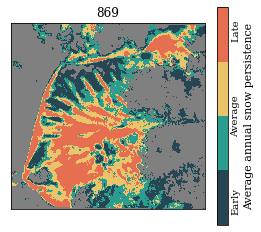

In [77]:
ds = xr.open_dataset(base_direc+DOMID+'/avgDSD_anomaly.tif')

ds = ds['band_data'][0,:,:].values
lims = np.nanpercentile(ds,[2.5,97.5])
ds[ds < lims[0]] = lims[0]
ds[ds > lims[1]] = lims[1]
quartiles = np.nanpercentile(ds,[25,50,75])
print(quartiles)

ds_copy = ds.copy()
ds_copy[ds <= quartiles[0]] = 0
ds[ds <= quartiles[0]] = np.nan
ds_copy[ds <= quartiles[1]] = 1
ds[ds <= quartiles[1]] = np.nan
ds_copy[ds <= quartiles[2]] = 2
ds[ds <= quartiles[2]] = np.nan
ds_copy[ds > quartiles[2]] = 3

fg,ax = plt.subplots(figsize=(4.35,4))
out = ax.imshow(ds_copy,cmap=cmap,interpolation='none')
ax.set_facecolor([0.5,0.5,0.5])
ax.set_xticks([])
ax.set_yticks([])
cbar = fg.colorbar(out)
cbar.set_ticks([0.325,1.5,3-0.325])
cbar.ax.tick_params(axis='both', which='both', length=0, width=0)
cbar.set_ticklabels(['Early','Average','Late'],rotation=90, va='center')
cbar.set_label('Average annual snow persistence',fontsize=11)
ax.set_title(DOMID)

fg.savefig('/Users/jpflug/Documents/Projects/cubesatReanaly/ppts/figs/'+DOMID+'_snowClass.svg',format='svg',bbox_inches='tight',dpi=1200)

In [78]:
# save the data!
class_outfile = '/Users/jpflug/Documents/Projects/cubesatReanaly/Data/Meadows/'+DOMID+'/classified_quartile.npy'
np.save(class_outfile,ds_copy)

In [64]:
custom_cmap = ['#7B57CC','#7D6CE1','#8181F7',
              '#B56FA7','#B997D0','#BFC0FA',
              '#EE8884','#F6C2C1','#FFFFFF']
custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')


snow_classes = np.empty((DAH.shape))
snow_classes[:] = np.nan

limsDAH = np.nanpercentile(DAH,[25,75])
print(limsDAH)
limsTPI = np.nanpercentile(TPI,[25,75])
print(limsTPI)

snow_classes[(DAH > limsDAH[1]) & (TPI < limsTPI[0])] = 1
snow_classes[(DAH > limsDAH[0]) & (DAH < limsDAH[1]) & (TPI < limsTPI[0])] = 2
snow_classes[(DAH < limsDAH[0])  & (TPI < limsTPI[0])] = 3
snow_classes[(DAH > limsDAH[1]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 4
snow_classes[(DAH > limsDAH[0]) & (DAH < limsDAH[1]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 5
snow_classes[(DAH < limsDAH[0]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 6
snow_classes[(DAH > limsDAH[1]) & (TPI > limsTPI[1])] = 7
snow_classes[(DAH < limsDAH[1]) & (DAH > limsDAH[0]) & (TPI > limsTPI[1])] = 8
snow_classes[(DAH < limsDAH[0]) & (TPI > limsTPI[1])] = 9



fg,ax = plt.subplots(figsize=(10,10))
out = ax.imshow(snow_classes,cmap=custom_cmap,interpolation='none')
fg.colorbar(out)
ax.set_facecolor([0.5,0.5,0.5])
ax.invert_yaxis()

-0.031543271240051476

In [63]:
limsTPI

-0.09710868176135137

/Users/jpflug/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jpflug/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/jpflug/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


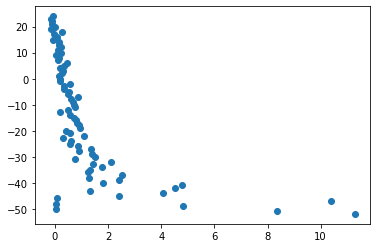

In [9]:
anom_round = np.round(anom)
dsd_unique = np.unique(anom_round)
mean_dah,mean_tpi = [],[]
for temp in dsd_unique:
    mean_dah.append(np.mean(DAH[anom_round == temp]))
    mean_tpi.append(np.mean(TPI[anom_round == temp]))
    
# plt.scatter(mean_dah,dsd_unique)
plt.scatter(mean_tpi,dsd_unique)

[Text(0, 0.33, '0.27'), Text(0, 0.66, '-0.21')]

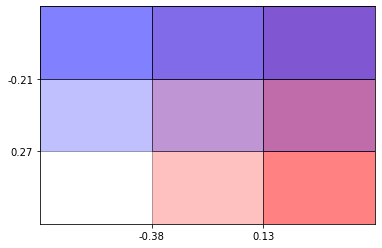

In [10]:
import matplotlib.patches as patches
fig, ax = plt.subplots()

for alpha_red in [0.0,0.33,0.66]:
    for alpha_blue in [0,0.33,0.66]:
        rectangle = patches.Rectangle((alpha_red,alpha_blue), 0.33, 0.33,
                                      edgecolor='k', facecolor=[1,0.25,0.25],alpha = alpha_red)
        ax.add_patch(rectangle)
        rectangle = patches.Rectangle((alpha_red,alpha_blue), 0.33, 0.33,
                                      edgecolor='k', facecolor=[0.25,0.25,1],alpha = alpha_blue)
        ax.add_patch(rectangle)

ax.set_xlim([0,0.99])
ax.set_ylim([0,0.99])

limsDAH = np.nanpercentile(DAH,[25,75])
ax.set_xticks([0.33,0.66])
ax.set_xticklabels(np.round(limsDAH*100)/100)

limsTPI = np.nanpercentile(TPI,[75,25])
ax.set_yticks([0.33,0.66])
ax.set_yticklabels(np.round(limsTPI*100)/100)


[-0.38258814  0.12510819]
[-0.20932982  0.26896201]


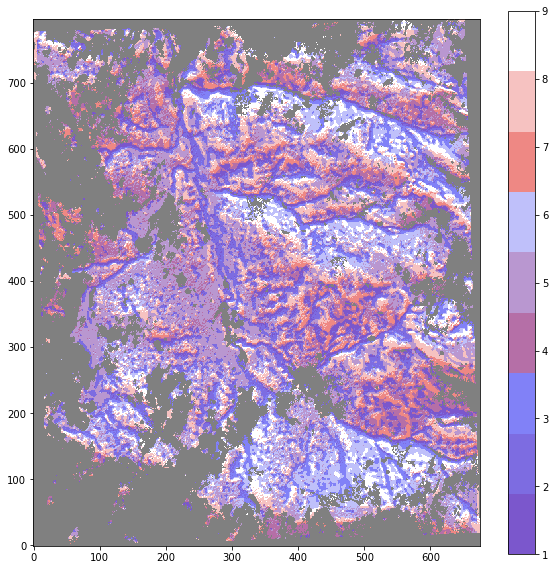

In [11]:
from matplotlib.colors import ListedColormap

custom_cmap = ['#7B57CC','#7D6CE1','#8181F7',
              '#B56FA7','#B997D0','#BFC0FA',
              '#EE8884','#F6C2C1','#FFFFFF']
custom_cmap = ListedColormap(custom_cmap, name='custom_discrete_cmap')


snow_classes = np.empty((DAH.shape))
snow_classes[:] = np.nan

limsDAH = np.nanpercentile(DAH,[25,75])
print(limsDAH)
limsTPI = np.nanpercentile(TPI,[25,75])
print(limsTPI)

snow_classes[(DAH > limsDAH[1]) & (TPI < limsTPI[0])] = 1
snow_classes[(DAH > limsDAH[0]) & (DAH < limsDAH[1]) & (TPI < limsTPI[0])] = 2
snow_classes[(DAH < limsDAH[0])  & (TPI < limsTPI[0])] = 3
snow_classes[(DAH > limsDAH[1]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 4
snow_classes[(DAH > limsDAH[0]) & (DAH < limsDAH[1]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 5
snow_classes[(DAH < limsDAH[0]) & (TPI > limsTPI[0]) & (TPI < limsTPI[1])] = 6
snow_classes[(DAH > limsDAH[1]) & (TPI > limsTPI[1])] = 7
snow_classes[(DAH < limsDAH[1]) & (DAH > limsDAH[0]) & (TPI > limsTPI[1])] = 8
snow_classes[(DAH < limsDAH[0]) & (TPI > limsTPI[1])] = 9



fg,ax = plt.subplots(figsize=(10,10))
out = ax.imshow(snow_classes,cmap=custom_cmap,interpolation='none')
fg.colorbar(out)
ax.set_facecolor([0.5,0.5,0.5])
ax.invert_yaxis()

In [13]:
np.save(class_outfile,snow_classes)

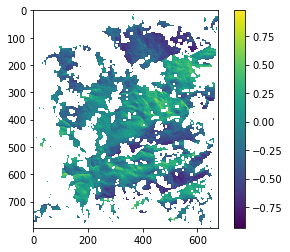

In [133]:
plt.imshow(DAH)
plt.colorbar()

0.01 0.48306196560362247
0.06210526315789474 0.48037328963787335
0.11421052631578947 0.475819195638071
0.16631578947368422 0.46886534848093986
0.21842105263157896 0.45889455560343706
0.2705263157894737 0.44524015954957435
0.32263157894736844 0.4272544059073658
0.37473684210526315 0.40441707258487003
0.4268421052631579 0.37647422052849344
0.4789473684210527 0.3435734668282648
0.5310526315789474 0.30634192219292855
0.5831578947368421 0.2658569429058675
0.6352631578947369 0.2234982501314825
0.6873684210526316 0.1807255479733957
0.7394736842105263 0.138859699763258
0.791578947368421 0.0989335034493804
0.8436842105263158 0.06163653411897729
0.8957894736842106 0.027337141065213552
0.9478947368421053 -0.0038524501470779964
1.0 -0.031999601189417866


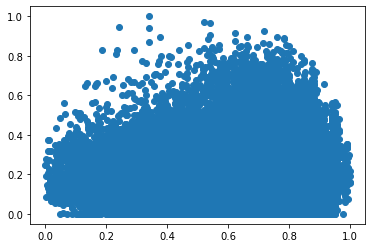

In [97]:
plt.scatter(np.ravel(anom_norm),np.ravel(TPI_norm*DAH_norm))

y = np.ravel(anom_norm)
y = y[~np.isnan(y)]

for weight in np.linspace(0.01,1,20):
    x = np.ravel((TPI_norm*weight)+(DAH_norm*(1-weight)))
    x = x[~np.isnan(x)]
    print(weight,np.corrcoef(x,y)[0,1])

In [82]:
data = np.column_stack((anom_norm[~np.isnan(anom_norm)],
                       DAH_norm[~np.isnan(anom_norm)],
                       TPI_norm[~np.isnan(anom_norm)]))
shpp = anom_norm.shape
X, Y = np.meshgrid(np.arange(shpp[1]),np.arange(shpp[0]))
X = X[~np.isnan(anom_norm)]
Y = Y[~np.isnan(anom_norm)]

kmn = KMeans(n_clusters=4)
kmn.fit(data)

KMeans(n_clusters=4)

In [83]:
labels = kmn.labels_

classified = np.empty(anom.shape)
classified[:] = np.nan
classified[Y.astype(int),X.astype(int)] = labels

fg,ax = plt.subplots(figsize=(10,10))

ax.imshow(classified)

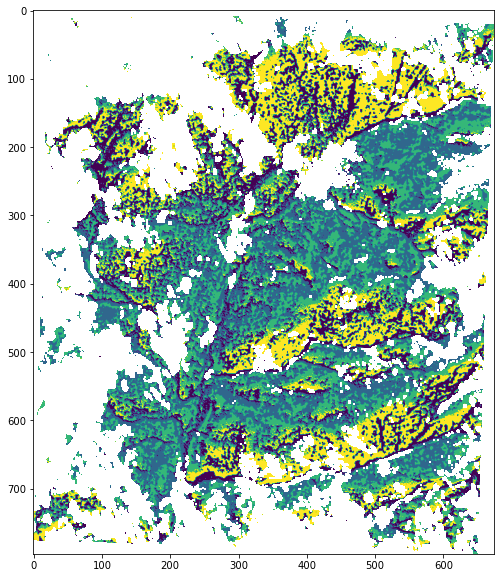

In [84]:
fg,ax = plt.subplots(figsize=(10,10))

ax.imshow(classified)

In [88]:
class_nos = np.unique(classified)[:-1]
for classidx in class_nos:
    print(classidx)

0.0
1.0
2.0
3.0


(-0.2, 0.2)

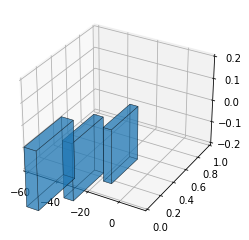

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cube(ax, limits):
    x_min, x_max, y_min, y_max, z_min, z_max = limits

    vertices = [
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ]

    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[0], vertices[3], vertices[7], vertices[4]]
    ]

    poly3d = Poly3DCollection(faces, alpha=0.5, edgecolor='k', linewidths=0.5)
    
    ax.add_collection3d(poly3d)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in np.unique(classified)[:-1]:
    # Plot the transparent cube
    temp1 = np.percentile(anom[classified == i],[25,75])
    temp2 = np.percentile(DAH[classified == i],[25,75])
    temp3 = np.percentile(TPI[classified == i],[25,75])
    plot_cube(ax,[temp1[0],temp1[1],temp2[0],temp2[1],temp3[0],temp3[1]])

# Set plot limits
ax.set_xlim([np.nanmin(anom),np.nanmax(anom)])
ax.set_ylim([0,1])
ax.set_zlim([-0.2,0.2])

In [48]:
colr = cm.jet(4)
# for i in np.unique(classified)[:-1]:

NameError: name 'cm' is not defined

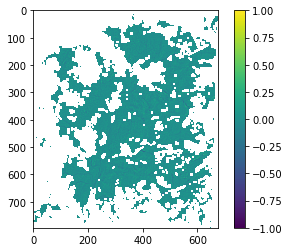

In [44]:
plt.imshow(TPI,vmin=-1,vmax=1)
plt.colorbar()

In [ ]:
shpp = eleV.shape
TPI = np.empty(eleV.shape)
TPI[:] = np.nan
# kernel = np.ones((9,9))
# kernel = kernel / np.sum(kernel)

# smoothed_elevation = convolve2d(eleV, kernel, mode='same', boundary='fill', fillvalue=0)
# plt.imshow(smoothed_elevation)

for yy in np.arange(shpp[0]):
    for xx in np.arange(shpp[1]):
        xLo = xx-1
        xHi = xx+2
        yLo = yy-1
        yHi = yy+2
        if xLo < 0:
            xLo = 0
        if yLo < 0:
            yLo = 0
        if xHi > shpp[1]:
            xHi = shpp[1]
        if yHi > shpp[0]:
            yHi = shpp[0]
        
        TPI[yy,xx] = eleV[yy,xx] - np.nanmean(eleV[yLo:yHi,xLo:xHi]) 
        # TPI[yy,xx] = smoothed_elevation[yy,xx] - np.nanmean(smoothed_elevation[yLo:yHi,xLo:xHi]) 
        
fg,ax = plt.subplots(figsize=(7,7))
out = ax.imshow(TPI,vmin=-0.2,vmax=0.2,interpolation='none',cmap='RdBu')
fg.colorbar(out)

In [ ]:
# Hansen veg doesn't seem to track. Could do NDVI from Planet??

# vegg = xr.open_dataset(veg_file)
# vegg = vegg.rio.reproject_match(ref_data)
# vegg = vegg['band_data'][0,:,:].values

# vegTemp = vegg.copy()
# vegTemp[vegTemp > 90] = 100
# vegTemp[vegTemp < 100] = 0
# vegTemp[np.isnan(anom)] = np.nan